<a href="https://colab.research.google.com/github/mohamedOubella/GSEII_2_AI_Project/blob/master/Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AI Project Done By:**


*   JADID TAHA
*   CHERKANI HASSANI MOHAMMED
*   OUBELLA MOHAMMED
*   GHAFIRI YOUNESS



In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Import dataset
# To use Google Colab and the dataset imported online

!wget https://raw.githubusercontent.com/mohamedOubella/GSEII_2_AI_Project/master/parkinsons.data
dataset = pd.read_csv('parkinsons.data')
dataset

--2020-04-24 22:10:55--  https://raw.githubusercontent.com/mohamedOubella/GSEII_2_AI_Project/master/parkinsons.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [text/plain]
Saving to: ‘parkinsons.data’

parkinsons.data     100%[===================>]  39.74K  --.-KB/s    in 0.01s   

2020-04-24 22:10:55 (3.18 MB/s) - ‘parkinsons.data’ saved [40697/40697]



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [0]:
#Get the features and labels
features=dataset.loc[:,dataset.columns!='status'].values[:,1:]
labels=dataset.loc[:,'status'].values

In [0]:
# Scale continuous data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer 
preprocess = StandardScaler()

In [0]:
features = preprocess.fit_transform(features)

In [0]:
# Split in train/test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

Now let us make our Artificail Neural Network

In [0]:
#First we installed the keras framework using this command
#conda install keras 

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# Build our classifier
def build_classifier(optimizer='adam'):
    # Initialising the ANN
    classifier = Sequential()
    #adding the layers
    classifier.add(Dense(units = 44, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
    classifier.add(Dense(units = 22, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    #compiling the clasifier
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [0]:
#Constructing the keras classifier with the input arguments   
from keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 500)

In [0]:
classifier2 = classifier.fit(X_train,y_train)

Epoch 1/500
156/156 [==============================] - 0s 662us/step - loss: 0.6922 - accuracy: 0.6667
Epoch 2/500
156/156 [==============================] - 0s 69us/step - loss: 0.6880 - accuracy: 0.7564
Epoch 3/500
156/156 [==============================] - 0s 87us/step - loss: 0.6825 - accuracy: 0.7564
Epoch 4/500
156/156 [==============================] - 0s 69us/step - loss: 0.6730 - accuracy: 0.7564
Epoch 5/500
156/156 [==============================] - 0s 99us/step - loss: 0.6592 - accuracy: 0.7564
Epoch 6/500
156/156 [==============================] - 0s 70us/step - loss: 0.6368 - accuracy: 0.7628
Epoch 7/500
156/156 [==============================] - 0s 77us/step - loss: 0.6053 - accuracy: 0.7949
Epoch 8/500
156/156 [==============================] - 0s 72us/step - loss: 0.5701 - accuracy: 0.8333
Epoch 9/500
156/156 [==============================] - 0s 76us/step - loss: 0.5302 - accuracy: 0.8397
Epoch 10/500
156/156 [==============================] - 0s 71us/step - loss: 0.49

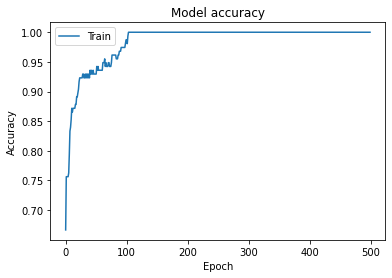

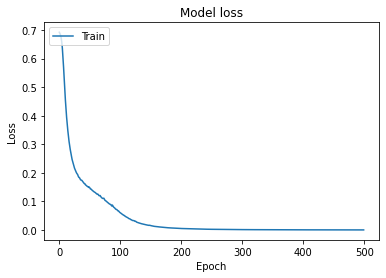

In [0]:
# Plot training and validation accuracy values
plt.plot(classifier2.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(classifier2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# EVALUATION

### MANUAL TEST

In [0]:
predicted = classifier.predict(X_test)
false_estimations=0
for i in range(predicted.size):
    if (predicted[i] != y_test[i]):
        false_estimations += 1
print('Our model was wrong %d times' % (false_estimations))

Our model was wrong 2 times


### Classification report 

In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



### Accuracy Score

In [0]:
accuracy =accuracy_score(y_test,predicted)
print("Accuracy is: %.4f " % accuracy)
# calculate the average cross-entropy
ce = keras.losses.binary_crossentropy(y_test, predicted)
mean_ce = np.mean(ce)
print('Average Cross Entropy: %.3f nats' % (mean_ce/100))

Accuracy is: 0.9487 
Average Cross Entropy: 0.063 nats


### Confusion Matrix

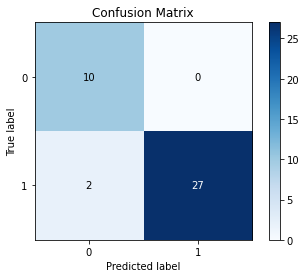

In [0]:
# Scikitplot packages are requied
# !pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predicted,normalize=False)

### ROC CURVE

In [0]:
# Cross Validation Classification ROC AUC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

scoring = 'roc_auc'
results = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring=scoring)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
124/124 [==============================] - 0s 830us/step - loss: 0.6925 - accuracy: 0.7016
Epoch 2/500
124/124 [==============================] - 0s 69us/step - loss: 0.6905 - accuracy: 0.7339
Epoch 3/500
124/124 [==============================] - 0s 106us/step - loss: 0.6879 - accuracy: 0.7339
Epoch 4/500
124/124 [==============================] - 0s 87us/step - loss: 0.6837 - accuracy: 0.7339
Epoch 5/500
124/124 [==============================] - 0s 74us/step - loss: 0.6774 - accuracy: 0.7339
Epoch 6/500
124/124 [==============================] - 0s 72us/step - loss: 0.6686 - accuracy: 0.7339
Epoch 7/500
124/124 [==============================] - 0s 70us/step - loss: 0.6559 - accuracy: 0.7339
Epoch 8/500
124/124 [==============================] - 0s 74us/step - loss: 0.6383 - accuracy: 0.7742
Epoch 9/500
124/124 [==============================] - 0s 84us/step - loss: 0.6138 - accuracy: 0.8226
Epoch 10/500
1

AUC: 0.962  (0.031) 


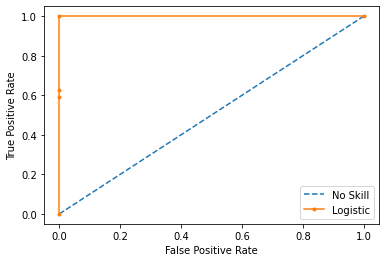

In [0]:
print("AUC: %.3f " % results.mean(), "(%.3f) " % results.std())
# predict probabilities
yhat = classifier.predict_proba(X_train)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_train, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()